<a href="https://colab.research.google.com/github/CallmeSIRI/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nomalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
#นำเข้าเดต้าที่สร้างได้
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/GroupQuiz1/Group6_2กาญจนสุดา_16วรรณนภา_21เกลิดา_31ศิริขวัญ.csv')

In [ ]:
weather_data.shape

(8169, 12)

In [ ]:
weather_data.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [ ]:
# ตัดข้อมูลหลักที่ไม่ต้องการออก อันนี้กลุ่มเราทำแล้วไม่ต้องใส่ -1 เหมือนอาจารย์
data_features = weather_data.iloc[:,4:]
data_features

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1008.39,69,1,0,0,18.4,26.8,18.0
8165,1006.05,61,1,0,0,17.3,27.8,19.5
8166,1004.86,55,2,0,0,13.0,26.3,16.0
8167,1005.76,56,1,2,0,13.8,25.2,15.3


In [ ]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [ ]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [ ]:
#data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int) #โค้ดผิด

In [ ]:
data_features[data_features.eq('-').any(1)] #ถ้าอันไหนเจอค่า eq เราจะดรอปทั้งหมด (เช็คทุกคอลัมน์)
#จะบอกว่าแถวไหน คอลัมน์มีค่าที่เราต้องการ

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,1009.88,78,4,4,-,23.5,27.9,24.3
306,1009.47,73,2,2,-,21.9,27.5,23.7
307,1008.08,69,3,3,-,20.7,27.3,22.5
308,1008.35,72,5,5,-,21.3,27.1,22.8
309,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...
8134,1011.66,72,1,-,0,15.6,23.9,15.0
8135,1011.62,73,2,-,0,15.7,23.2,15.0
8140,1015.28,74,2,1,-,15.2,22.6,-
8161,1013.57,68,1,-,0,15.2,23.2,14.0


In [ ]:
#weather_data[weather_data.eq('-').any(1)==False]

In [ ]:
data_features[data_features['ความเร็วลม'].eq('-')] #เลือกเช็คแค่คอลัมน์ความเร็วลม

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,1011.47,61,-,-,-,19.7,28.5,22.7
1773,1008.50,73,-,4,0,20.2,25.6,20
1776,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,1009.45,73,-,4,0,23.9,29.7,24.9
1862,1011.50,70,-,6,0,21.0,27.5,22.2
1927,1015.58,65,-,2,0,15.0,22.7,15.3
1995,1014.22,67,-,1,-,19.4,26.5,20.6
2063,1013.33,68,-,-,-,14.0,21.0,-
2125,1011.17,72,-,8,0,21.3,27.1,23.0


In [ ]:
data_features_d = data_features[data_features.eq('-').any(1)==False] #ดรอปข้อมมูลที่มี - ออก
data_features_d.shape

(5208, 8)

In [ ]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False] #ดรอปข้อมมูลที่มีค่า T ออก
data_features_d.shape

(5061, 8)

In [ ]:
data_features_d.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [ ]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [ ]:
data_features_d.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,25.002667,19.933570
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,2.720534,3.295887
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,26.900000,22.500000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,31.000000,26.700000


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14,14]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

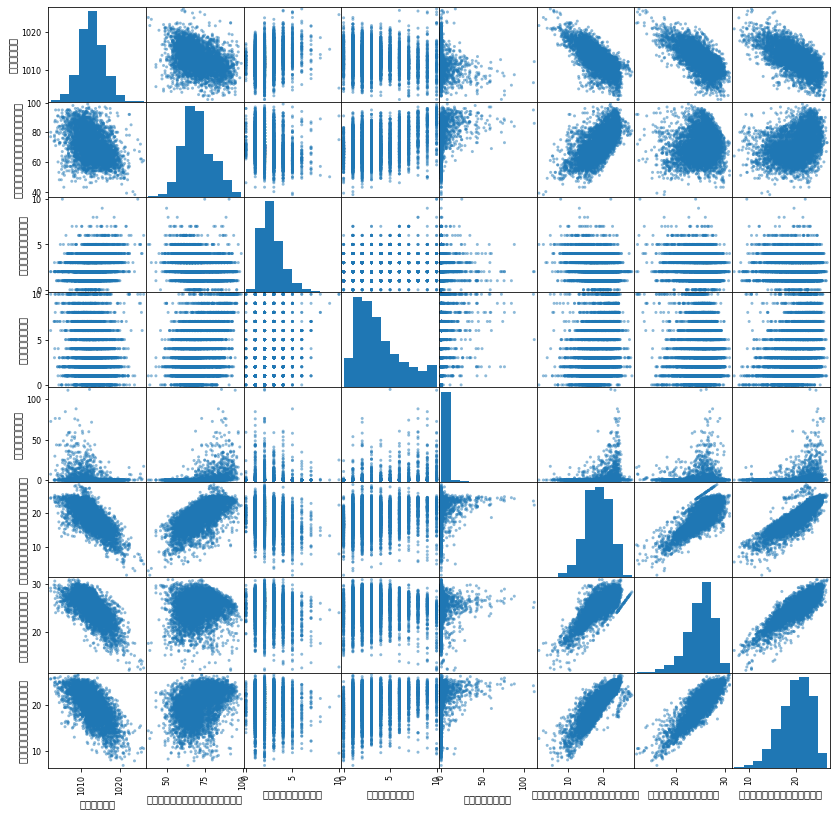

In [ ]:
pd.plotting.scatter_matrix(data_features_d);

In [ ]:
from matplotlib import pyplot as plt

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([1002.04 , 1004.446, 1006.852, 1009.258, 1011.664, 1014.07 ,
        1016.476, 1018.882, 1021.288, 1023.694, 1026.1  ]),
 <a list of 10 Patch objects>)

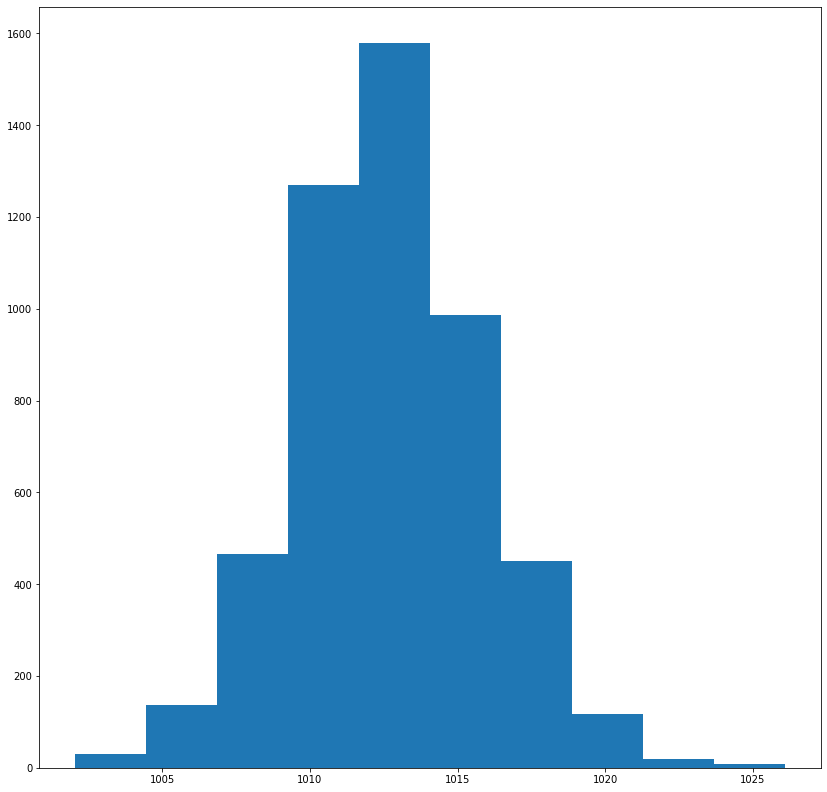

In [ ]:
plt.hist(data_features_d['ความกด'])

In [ ]:
from sklearn import preprocessing

### StandardScaler

In [ ]:
#define คือ การบอกวิธีการที่จะทำ (ตั้งค่า)
scaler = preprocessing.StandardScaler()
#train คือ การสร้างโมเดลจากเดต้า (สร้างโมเดล)
scaler.fit(data_features_d)
#predict นำไปใช้งาน
data_features_d_s = scaler.transform(data_features_d)

In [ ]:
data_features_d_s

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         0.95480871,  1.47666181],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.21958617,  0.93047261],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.21958617,  0.65737801],
       ...,
       [-2.49224914, -1.63664607, -0.23542385, ..., -1.49332646,
         0.47691406, -1.19359649],
       [-2.20728764, -1.53063368, -1.06226641, ..., -1.27294767,
         0.07254167, -1.4060034 ],
       [-1.43155912, -1.31860891, -1.06226641, ..., -0.88728479,
         0.21958617, -1.19359649]])

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

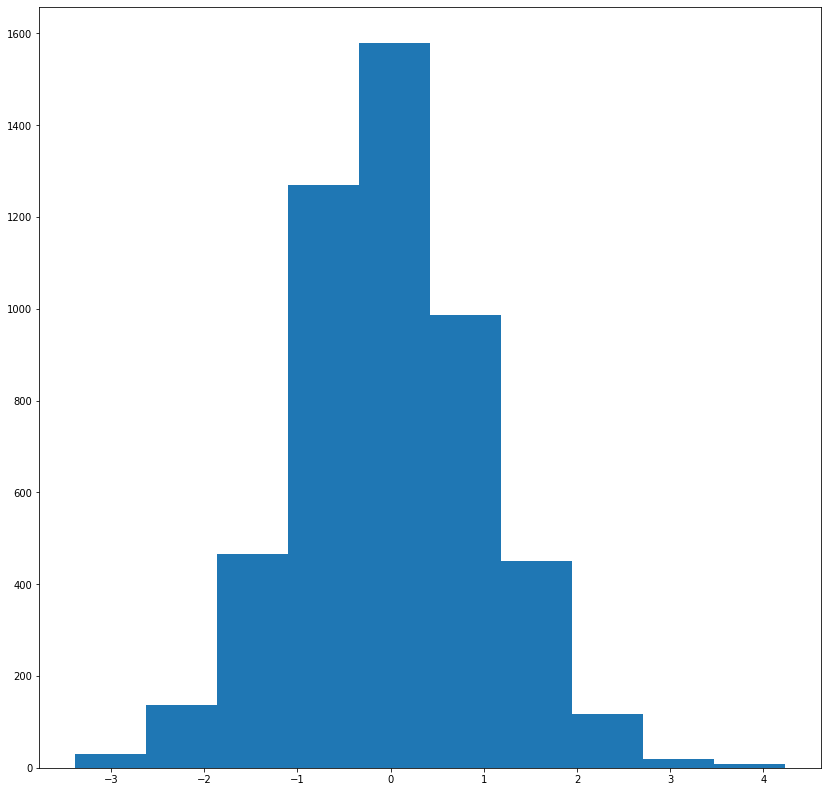

In [ ]:
plt.hist(data_features_d_s[:,0]) #ใช้แถวกับหลักในการบอกว่าจะเอาอันไหนมา เพราะมันเป็นนัมพาย

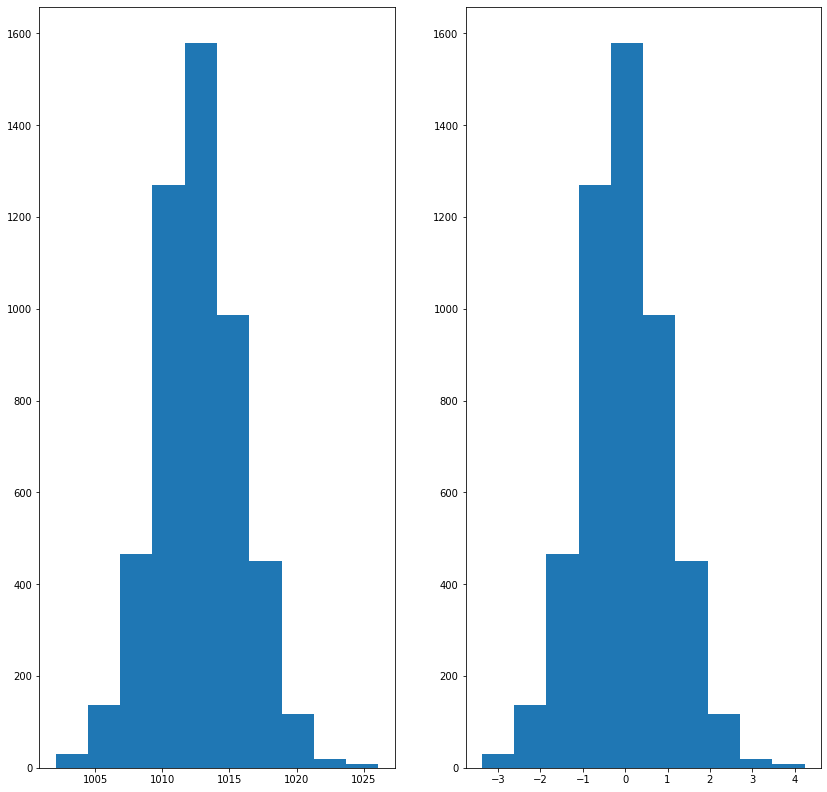

In [ ]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

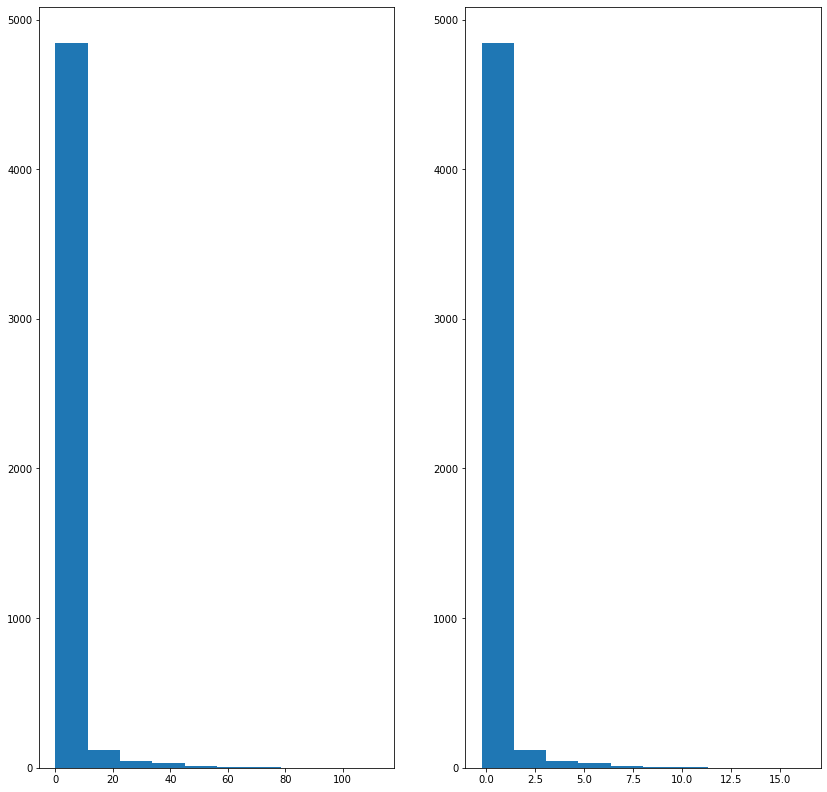

In [ ]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,4]);

##Min-max narmalization

In [ ]:
#define คือ การบอกวิธีการที่จะทำ (ตั้งค่า)
scaler = preprocessing.MinMaxScaler()
#train คือ การสร้างโมเดลจากเดต้า (สร้างโมเดล)
scaler.fit(data_features_d)
#predict นำไปใช้งาน
data_features_d_norm = scaler.transform(data_features_d)

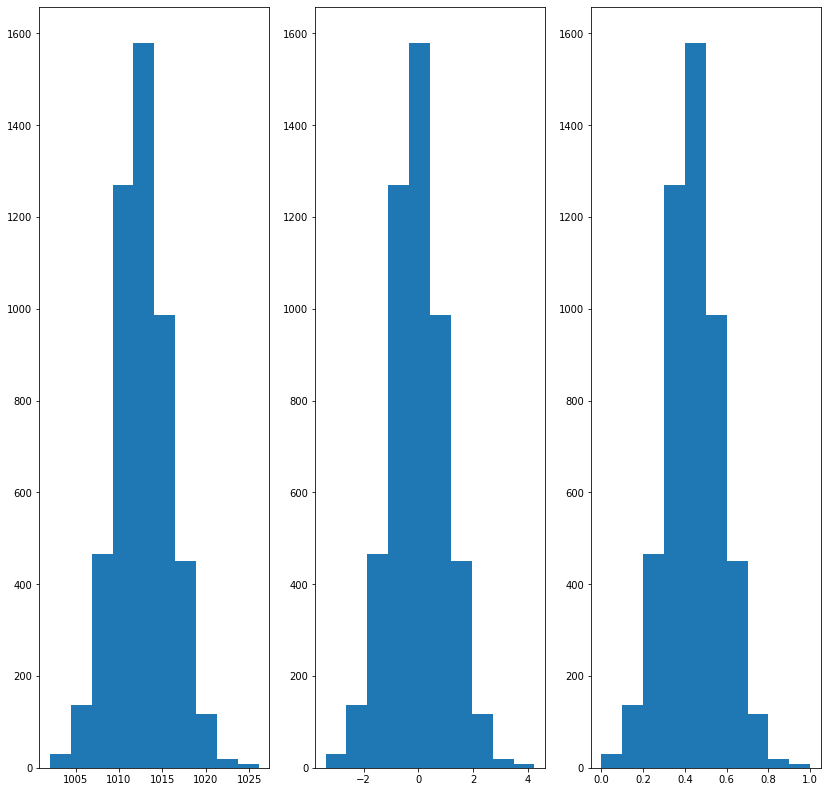

In [ ]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0]);
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]);

# Discritization

In [ ]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/ส่ง data บ้าน/31_ศิริขวัญ บุญศรี.csv')
home_data.head()

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


ดรอปค่ามิสซิ่งที่มีในคอลัมน์ sell_price ดรอปเฉพาะแถวที่มีมิสซิ่งไม่ใช่ดรอปทั้งหมด

## ลบ record ที่ ค่า sell price เป็นค่าว่าง

In [ ]:
home_data.shape

(100, 23)

In [ ]:
home_data = home_data.dropna(subset=['sell_price'])

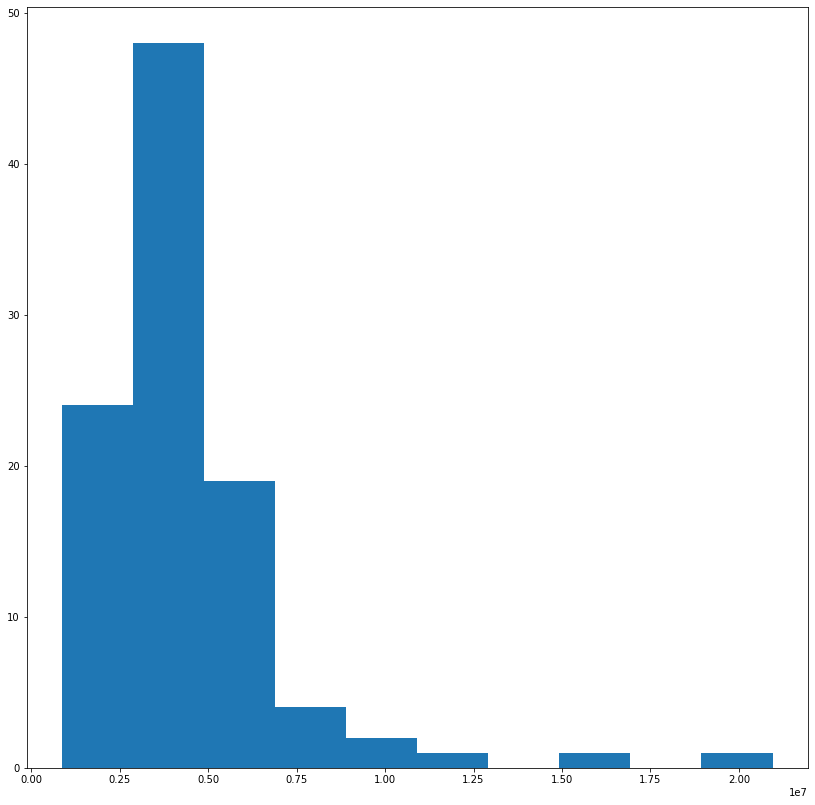

In [ ]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price 
- ราคาที่ต่ำกว่า 5m ให้เป็น 1
- ราคาระหว่าง 5m-10m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3

แบ่งออกเป็น 3 กลุ่ม 1 2 3 คือชื่อกลุ่ม

In [ ]:
print(home_data.groupby('sell_price').groups)

{880000.0: [19], 905000.0: [20], 1150000.0: [26], 1200000.0: [28, 31, 43, 44], 1375000.0: [99], 1800000.0: [18], 1900000.0: [85], 2050000.0: [42], 2090000.0: [35], 2100000.0: [87], 2490000.0: [33], 2500000.0: [39], 2590000.0: [62], 2600000.0: [1], 2640000.0: [57], 2700000.0: [0], 2750000.0: [4], 2860000.0: [12, 50, 56], 2871000.0: [58], 2900000.0: [71, 77], 2915000.0: [55], 2970000.0: [13, 15], 2990000.0: [97], 3000000.0: [53, 78], 3100000.0: [41], 3190000.0: [63], 3200000.0: [34], 3300000.0: [64, 68], 3390000.0: [29], 3410000.0: [81], 3500000.0: [67, 79], 3520000.0: [88], 3570000.0: [27], 3630000.0: [17], 3700000.0: [74], 3750000.0: [30], 3800000.0: [72], 3905000.0: [16], 3934000.0: [89], 3980000.0: [37], 3990000.0: [70], 4000000.0: [25, 36, 90, 91, 98], 4070000.0: [9, 54, 82], 4180000.0: [52], 4200000.0: [21], 4235000.0: [92], 4400000.0: [3, 10, 38], 4510000.0: [14, 51, 76], 4660000.0: [83], 4700000.0: [24], 4707000.0: [93], 4774000.0: [23], 4900000.0: [22], 4950000.0: [11, 49], 5000

In [ ]:
print(home_data.groupby('sell_price').size())

sell_price
880000.0      1
905000.0      1
1150000.0     1
1200000.0     4
1375000.0     1
             ..
9680000.0     1
10263000.0    1
12500000.0    1
16500000.0    1
20949000.0    1
Length: 77, dtype: int64


In [ ]:
print(list(home_data.groupby('sell_price').size()))

[1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
price = home_data[home_data['sell_price']<5000000]
price.insert(22,'price_class','1')
price

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,price_class,d1500-7/11
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,1,2
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,1,5
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,1,12
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,1,4
9,9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,0,2,4,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,19483.0,0.0,0.0,59.9,2.0,0.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,4235000.0,0,0,2,6,9,1,11
93,93,19492.0,0.0,0.0,90.3,2.0,0.0,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4707000.0,0,0,2,3,4,1,7
97,97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,1,9
98,98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,1,4


In [ ]:
def filter(x):
  if x < 5000000:
    return "1"
  if x > 5000000:
    return "2"
  if x > 10000000:
    return "3"

## One-hot-encoder

In [ ]:
import pandas as pd

In [ ]:
home_data

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4


In [ ]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])
home_data_dummies

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
96,96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
